# Udemy Courses Project

This notebook provides a structured approach to handling data cleaning, exploratory data analysis (EDA), and data visualization tasks using the **Udemy Courses** dataset.

Each step will cover various aspects of cleaning, analyzing, and visualizing the dataset.

<h1 style="color: #2E86C1; text-align: center;">Exploratory Data Analysis on Educational Data</h1>
    <p style="font-size: 16px; color: #2C3E50; text-align: center;">
        This project involves an Exploratory Data Analysis (EDA) conducted on a dataset related to the education sector. 
        The analysis aims to understand the internal structure of the dataset, detect outliers, and visualize the data distributions.
    </p>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
import missingno as msno
import plotly.express as px
from IPython.display import display, HTML # Lots of library import for the project

## Step 1: Loading the Dataset and Initial Exploration

In [6]:
# Load the dataset 

# Display first few rows
# Check the structure of the dataset.
# Inspect the data types and missing values using df.info()
# Get basic statistics for numerical columns with df.describe()
# and more..

In [7]:
df0 = pd.read_csv("udemy_courses_dataset.csv") # Dataset loading

In [8]:
df=df0.copy() # Dataset attending as a dataFrame

In [9]:
df.info() # Get general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3678.0,675971.963295,343273.156040,8324.0,407692.5,687917.0,961355.50,1282064.0
price,3678.0,66.049483,61.005755,0.0,20.0,45.0,95.00,200.0
num_subscribers,3678.0,3197.150625,9504.117010,0.0,111.0,911.5,2546.00,268923.0
num_reviews,3678.0,156.259108,935.452044,0.0,4.0,18.0,67.00,27445.0
num_lectures,3678.0,40.108755,50.383346,0.0,15.0,25.0,45.75,779.0
content_duration,3678.0,4.094517,6.053840,0.0,1.0,2.0,4.50,78.5


In [11]:
df.head() # Display first 5 rows

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [12]:
df.tail() # Last 5 rows

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [13]:
df.sample(5) # Random 5 rows showing

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
837,305368,NPV and IRR Techniques for CA / CFA / CPA Exams,https://www.udemy.com/business-investment-deci...,True,20,1551,5,55,Beginner Level,7.5,2014-09-22T14:30:17Z,Business Finance
989,295909,Legal Accounting,https://www.udemy.com/solicitors-accounts/,True,110,26,6,49,All Levels,4.0,2014-09-21T04:58:16Z,Business Finance
1008,231256,FOREX Currency Trading For Beginners,https://www.udemy.com/forex-currency-trading-f...,True,25,35,2,28,Beginner Level,4.0,2014-06-17T22:18:21Z,Business Finance
1813,101498,Blues Guitar Lessons - From Texas To Carolina,https://www.udemy.com/jim-bruce-blues-guitar-l...,True,20,1297,12,9,Intermediate Level,2.5,2013-10-13T09:01:34Z,Musical Instruments
2383,106358,Learn To Play Guitar Complete Beginners Quick ...,https://www.udemy.com/learn-to-play-guitar-for...,True,20,75,0,11,Beginner Level,1.0,2013-10-16T16:25:07Z,Musical Instruments


In [14]:
mv = df.isnull().sum() # Check for missing values
print("missing_values:\n", mv)

missing_values:
 course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64


In [15]:
df.replace(['Unknown', 'N/A', 'Missing', '?', ''], pd.NA, inplace=True) # Check for characterical control
((df == '').sum())
(df.isnull().sum())  

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [16]:
# "Unknown", "N/A", "Missing" kind of values checking and if there is something we replace to NaN values
# Not: pd.NA, "Not Available" (mevcut değil) >> It is use to show missing or undefined data

In [17]:
df.isnull().mean() * 100 # Percentage of missing values

course_id              0.0
course_title           0.0
url                    0.0
is_paid                0.0
price                  0.0
num_subscribers        0.0
num_reviews            0.0
num_lectures           0.0
level                  0.0
content_duration       0.0
published_timestamp    0.0
subject                0.0
dtype: float64

#### Additional info
To fill in missing values a numeric column with an average
- **Note1**: df['num_subscribers'].fillna(df['num_subscribers'].mean(), inplace=True)

To remove missing values if necessary
- **Note2**: df.dropna(inplace=True)

<Axes: >

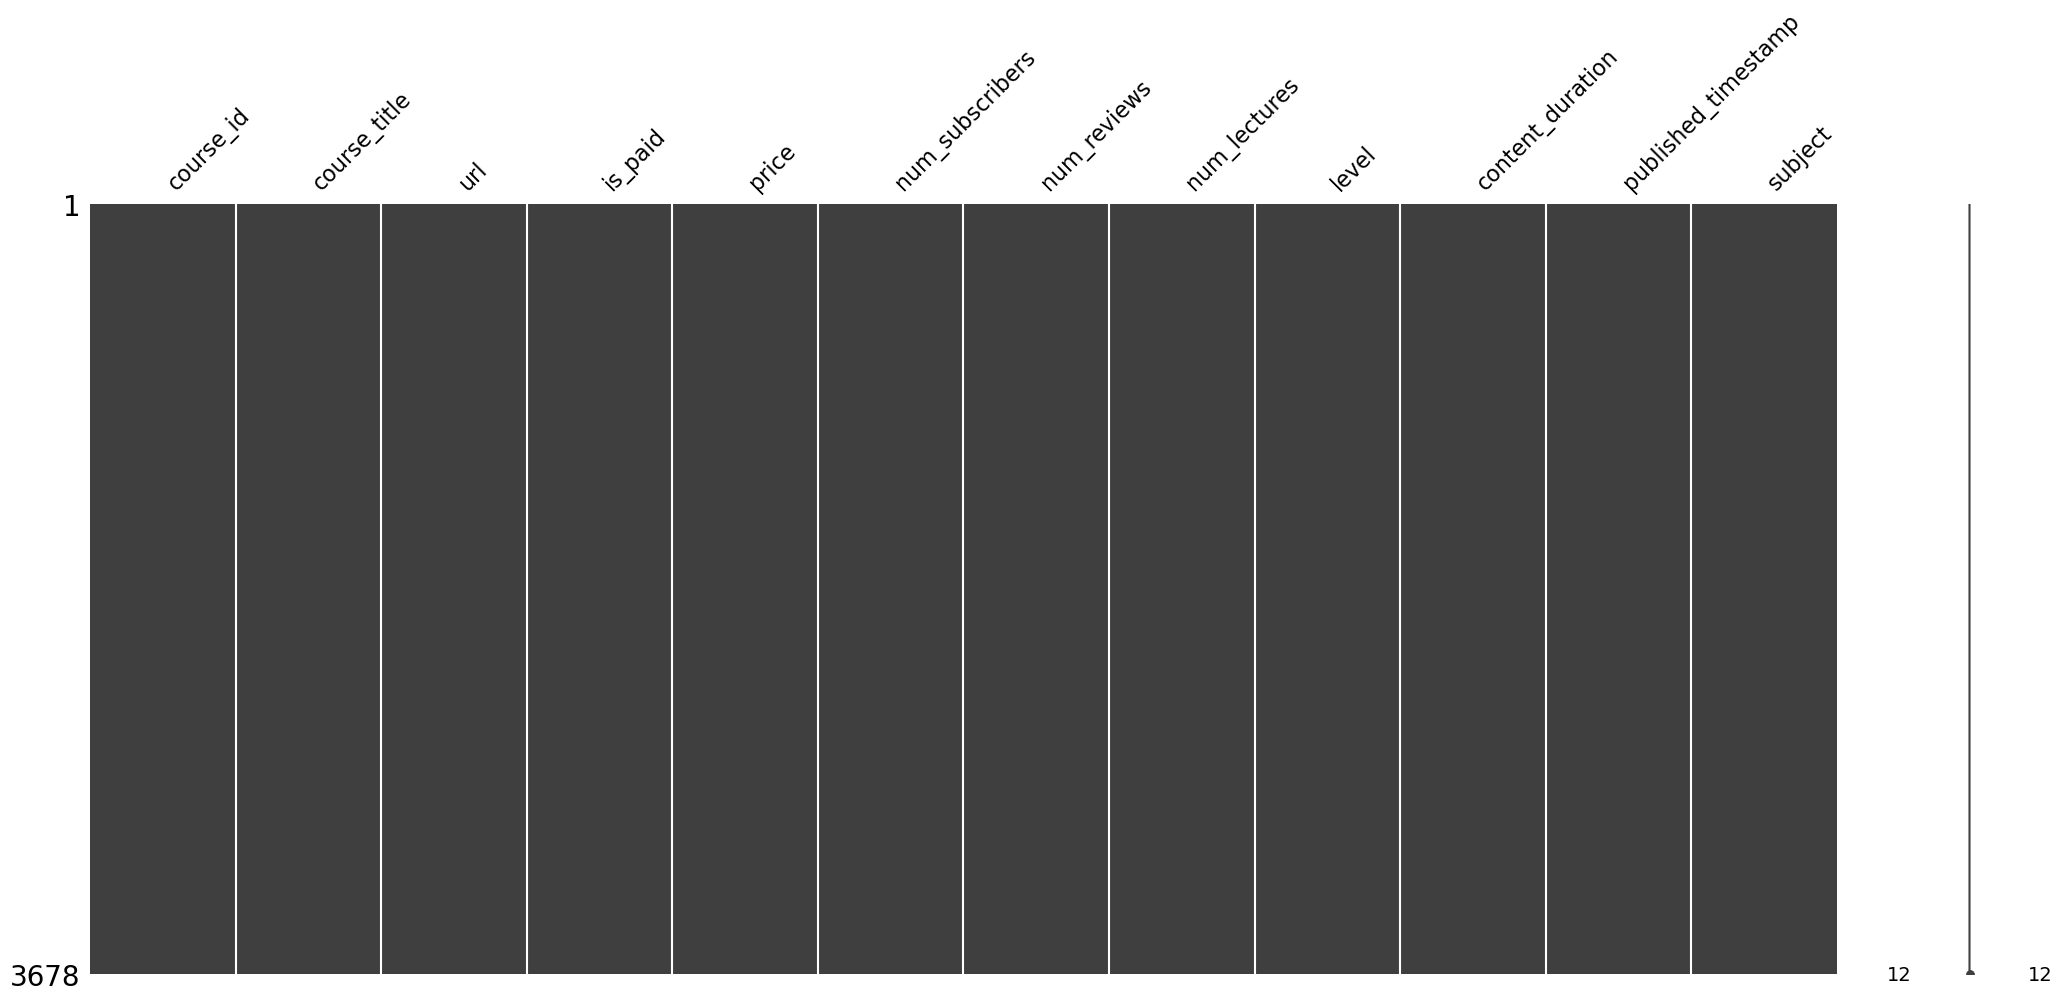

In [19]:
msno.matrix(df) 

<div style="text-align: center;">
    <span style="color: blue; font-weight: bold;">Visualization of missing data</span>
</didiv>


In [21]:
(df.dtypes) # Data types

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [22]:
dublicated_count = df.duplicated().sum()
dublicated_count

6

In [23]:
duclicated_courses = df[df.duplicated(subset='course_id', keep=False)]
duclicated_courses

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design


In [24]:
df = df.drop_duplicates(subset='course_id')
df

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [25]:
print("Column_Number", df.shape[0])
print("Unique course_id number:", df['course_id'].nunique()) # Check new status

Column_Number 3672
Unique course_id number: 3672


In [26]:
(df.shape) # Check new status

(3672, 12)

In [27]:
df.describe().T # Get summary statistics with Transpose, examine summary statistics for each column more regularly.

,count,mean,std,min,25%,50%,75%,max
course_id,3672.0,675897.698257,343071.951301,8324.0,407761.50,687692.0,960814.00,1282064.0
price,3672.0,66.102941,61.035920,0.0,20.00,45.0,95.00,200.0
num_subscribers,3672.0,3190.586874,9488.105448,0.0,111.75,912.0,2548.75,268923.0
num_reviews,3672.0,156.371460,936.178649,0.0,4.00,18.0,67.00,27445.0
num_lectures,3672.0,40.140251,50.417102,0.0,15.00,25.0,46.00,779.0
content_duration,3672.0,4.097603,6.057830,0.0,1.00,2.0,4.50,78.5


In [28]:
df['course_id'].count() 

3672

In [29]:
(df['level'].unique()) # Examine unique values ​​of categorical columns

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

## Step 2: Analyzing and Handling Outliers

In [31]:
# Boxplot for outlier detection

# Example: Removing outliers
# df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

### Analyzing The Price with Handling Outliers

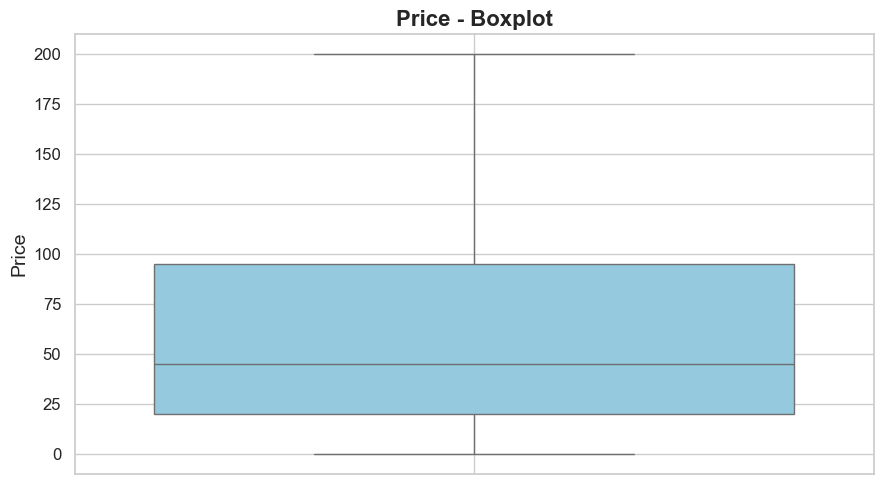

In [33]:
plt.figure(figsize=(9, 5))  
sns.set(style="whitegrid")  # Set the background style

# Boxplot Method
sns.boxplot(y=df['price'], color='skyblue')

plt.title('Price - Boxplot', fontsize=16, fontweight='bold')
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)  # Font size on x-axis
plt.yticks(fontsize=12)  # Font size on y-axis

plt.grid(True)  # Add grid lines
plt.tight_layout()  # Optimize placement of elements

In [34]:
df1 = df[df['price'] < df['price'].quantile(0.99)]


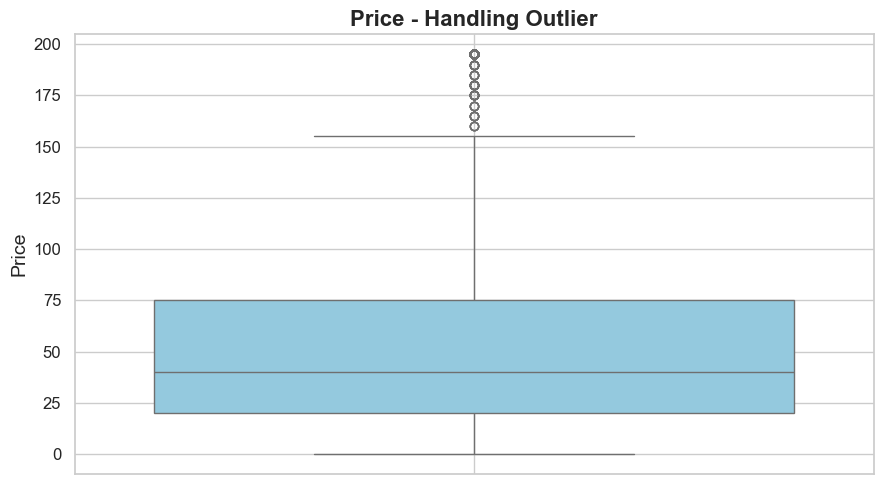

In [35]:
plt.figure(figsize=(9, 5))  
sns.set(style="whitegrid")  # Set the background style

# Boxplot Method
sns.boxplot(y=df1['price'], color='skyblue')

plt.title('Price - Handling Outlier', fontsize=16, fontweight='bold')
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)  # Font size on x-axis
plt.yticks(fontsize=12)  # Font size on y-axis

plt.grid(True)  # Add grid lines
plt.tight_layout()  # Optimize placement of elements

In [36]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3377.0,665475.406574,342671.555625,8324.0,396888.0,673750.0,947098.0,1282064.0
price,3377.0,54.406278,48.450470,0.0,20.0,40.0,75.0,195.0
num_subscribers,3377.0,3073.587208,9268.450464,0.0,101.0,833.0,2427.0,268923.0
num_reviews,3377.0,140.173231,743.181309,0.0,4.0,17.0,62.0,19649.0
num_lectures,3377.0,37.317442,42.278415,0.0,14.0,25.0,44.0,527.0
content_duration,3377.0,3.824578,5.407624,0.0,1.0,2.0,4.5,78.5


<span style="color: blue; font-weight: bold;">boxplot price after removal of outliers</span>

##### Determining the lower and upper values ​​of outliers

In [39]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

In [40]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [41]:
outliers = df1[(df1['price'] < lower_bound) | (df1['price'] > upper_bound)]
print("Interquartile Range:\n", outliers)

Interquartile Range:
       course_id                                       course_title  \
8        476268  Options Trading 3 : Advanced Stock Profit and ...   
13       794151  Forex Trading Course: Work Smarter Not Harder ...   
27       447362  Create Your Own Hedge Fund: Trade Stocks Like ...   
35       434774  Options Trading Stocks: Proven Toolbox For Fin...   
36       308690  Forex Trading A-Z™ - With LIVE Examples of For...   
...         ...                                                ...   
3486    1200874  Become PHP Facebook Developer: Password-Less A...   
3495     482834                                HTML5 for beginners   
3559     882128                   The Complete JavaScript Bootcamp   
3567    1135712       Mastering Modern Web Development Using React   
3647     975916  17 Complete JavaScript   projects explained st...   

                                                    url  is_paid  price  \
8     https://www.udemy.com/day-trading-stock-option...     Tr

In [42]:
df_cleaned = df1[(df1['price'] >= lower_bound) & (df1['price'] <= upper_bound)]
df_cleaned

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.0,2014-05-02T15:13:30Z,Business Finance
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.0,2016-02-21T18:23:12Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


### Analysis of number of subscribers

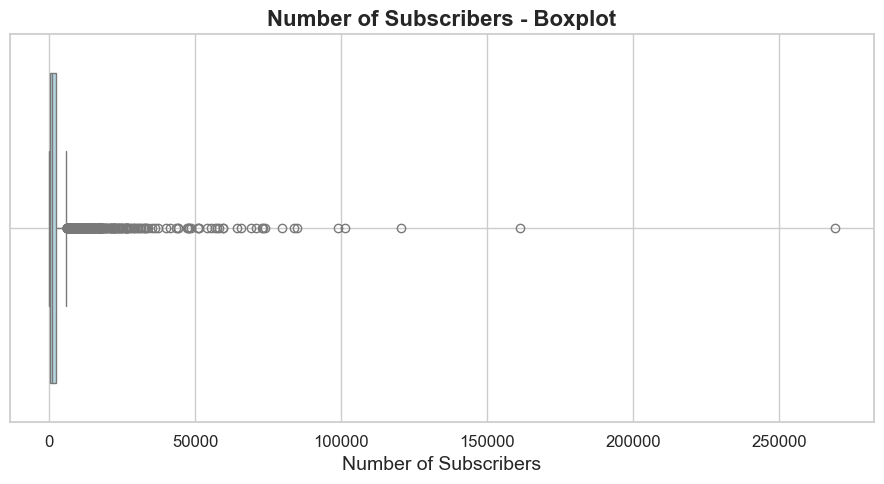

In [44]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df1['num_subscribers'], color='lightblue')

plt.title('Number of Subscribers - Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Number of Subscribers', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [45]:
df2 = df1[df1['num_subscribers'] < df1['num_subscribers'].quantile(0.995)]

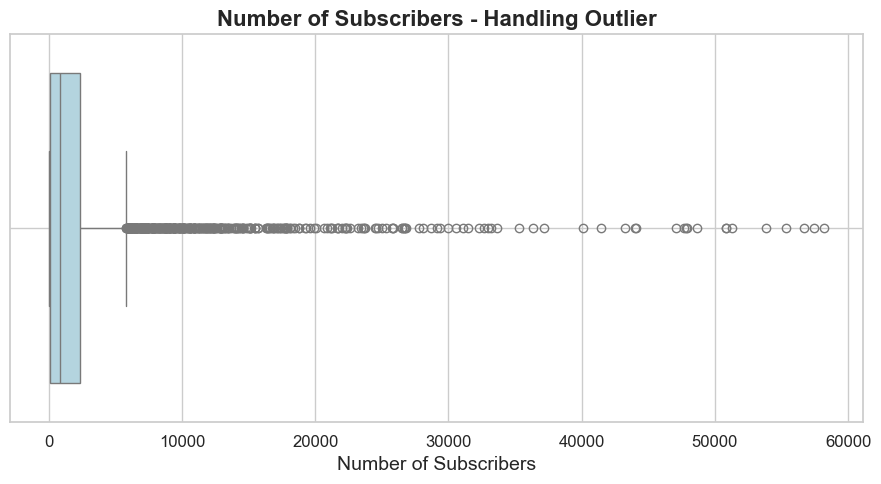

In [46]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df2['num_subscribers'], color='lightblue')

plt.title('Number of Subscribers - Handling Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Number of Subscribers', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [47]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3360.0,667831.157143,341631.777037,8324.0,399863.5,677283.0,947674.50,1282064.0
price,3360.0,54.476190,48.302775,0.0,20.0,40.0,75.00,195.0
num_subscribers,3360.0,2610.864881,5573.138389,0.0,99.0,820.0,2379.75,58208.0
num_reviews,3360.0,111.743155,496.272735,0.0,4.0,16.0,60.25,15117.0
num_lectures,3360.0,37.180060,41.964175,0.0,14.0,25.0,44.00,527.0
content_duration,3360.0,3.807024,5.392185,0.0,1.0,2.0,4.50,78.5


<span style="color: blue; font-weight: bold;">boxplot num_subscribers after removal of outliers</span>


### Analysis to Number of Reviews

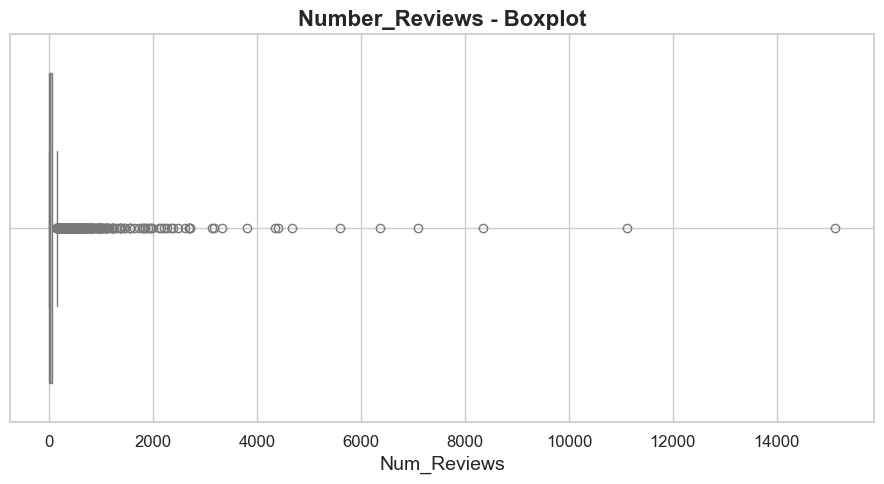

In [50]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df2['num_reviews'], color='lightblue')

plt.title('Number_Reviews - Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Num_Reviews', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [51]:
df3 = df2[df2['num_reviews'] < df2['num_reviews'].quantile(0.999)]

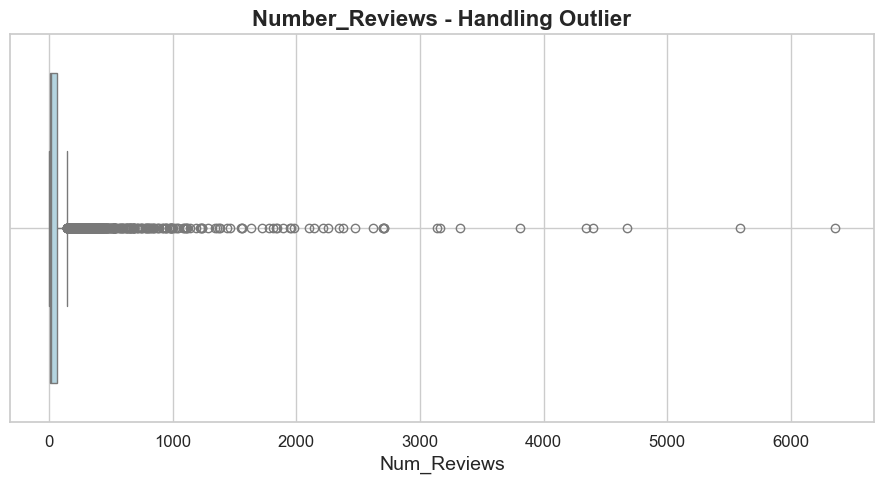

In [52]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df3['num_reviews'], color='lightblue')

plt.title('Number_Reviews - Handling Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Num_Reviews', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [53]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3356.0,667935.001192,341791.828947,8324.0,399522.50,677283.0,948226.50,1282064.0
price,3356.0,54.326579,48.132418,0.0,20.00,40.0,75.00,195.0
num_subscribers,3356.0,2556.446961,5343.384455,0.0,98.75,817.0,2361.25,57422.0
num_reviews,3356.0,99.454708,329.260653,0.0,4.00,16.0,60.00,6357.0
num_lectures,3356.0,37.069726,41.837546,0.0,14.00,25.0,44.00,527.0
content_duration,3356.0,3.793385,5.376038,0.0,1.00,2.0,4.50,78.5


<span style="color: blue; font-weight: bold;">boxplot num_reviews after removal of outliers</span>

### Analysis of number of lectures

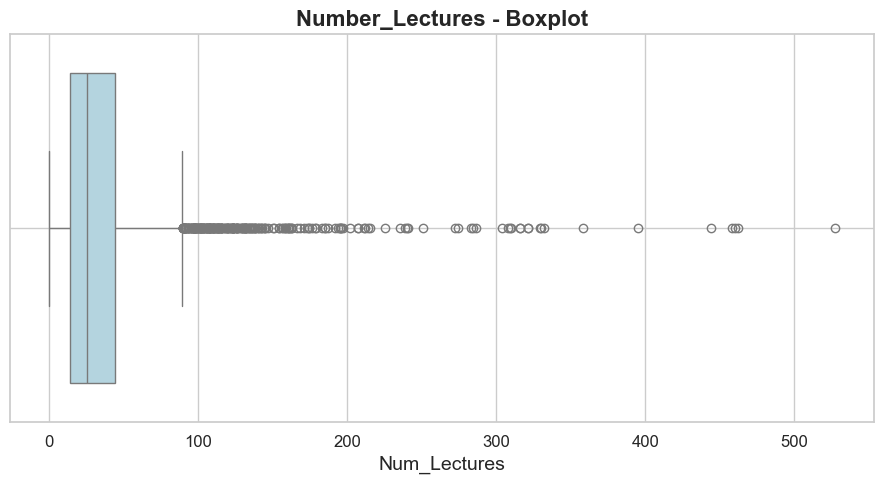

In [56]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df3['num_lectures'], color='lightblue')

plt.title('Number_Lectures - Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Num_Lectures', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [57]:
df4 = df3[df3['num_lectures'] < df3['num_lectures'].quantile(0.995)] 

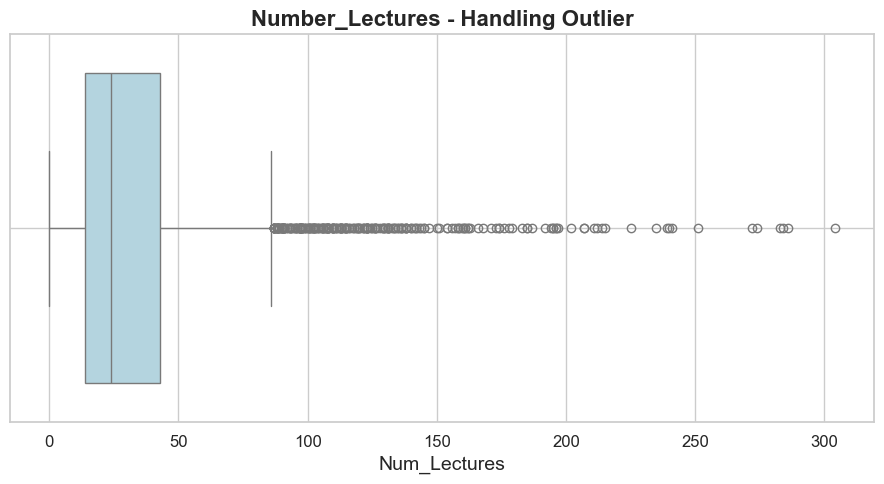

In [58]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df4['num_lectures'], color='lightblue')

plt.title('Number_Lectures - Handling Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Num_Lectures', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [59]:
df4.describe().T 

,count,mean,std,min,25%,50%,75%,max
course_id,3339.0,667981.664870,342023.361699,8324.0,399405.0,677802.0,947851.0,1282064.0
price,3339.0,53.945792,47.767064,0.0,20.0,40.0,75.0,195.0
num_subscribers,3339.0,2535.365379,5288.799981,0.0,98.0,814.0,2358.0,57422.0
num_reviews,3339.0,96.467805,314.361272,0.0,4.0,16.0,60.0,6357.0
num_lectures,3339.0,35.372866,34.150071,0.0,14.0,24.0,43.0,304.0
content_duration,3339.0,3.630758,4.690329,0.0,1.0,2.0,4.0,78.5


<span style="color: blue; font-weight: bold;">boxplot num_lectures after removal of outliers</span>

### Analysis of Content duration

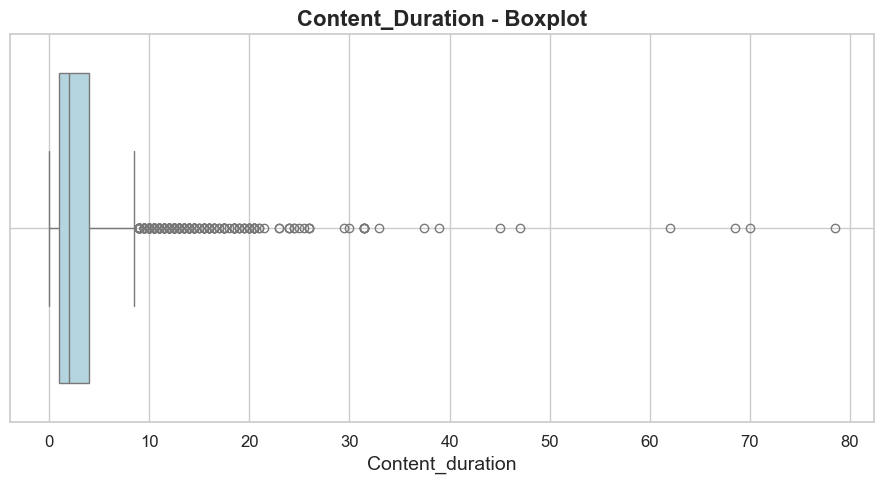

In [62]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df4['content_duration'], color='lightblue')

plt.title('Content_Duration - Boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Content_duration', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [63]:
df5 = df4[df4['content_duration'] < df4['content_duration'].quantile(0.999)]

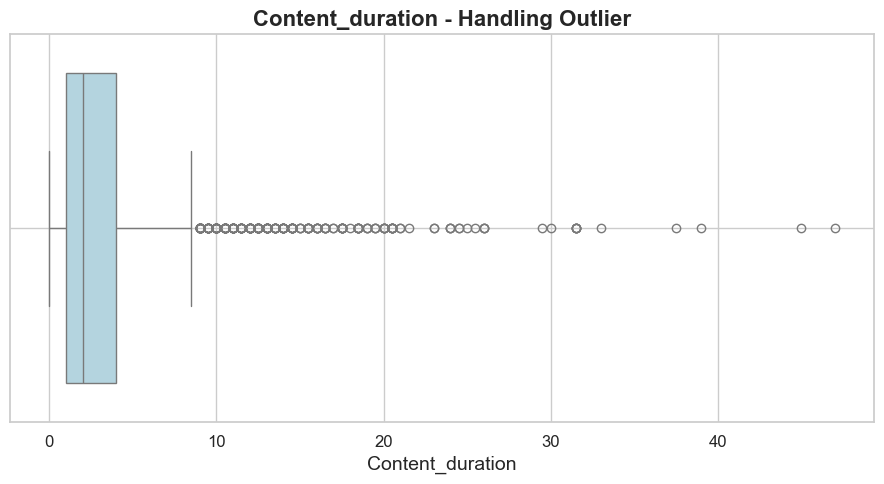

In [64]:
plt.figure(figsize=(9,5))
sns.set(style="whitegrid")
sns.boxplot(x=df5['content_duration'], color='lightblue')

plt.title('Content_duration - Handling Outlier', fontsize=16, fontweight='bold')
plt.xlabel('Content_duration', fontsize=14)

plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

plt.grid(True)  
plt.tight_layout()

In [65]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
course_id,3335.0,668411.877061,341736.020727,8324.0,400109.0,678142.0,947851.0,1282064.0
price,3335.0,53.941529,47.786372,0.0,20.0,40.0,75.0,195.0
num_subscribers,3335.0,2530.630285,5285.859368,0.0,98.0,813.0,2357.5,57422.0
num_reviews,3335.0,96.179610,314.289608,0.0,4.0,16.0,59.0,6357.0
num_lectures,3335.0,35.292954,33.997516,0.0,14.0,24.0,43.0,304.0
content_duration,3335.0,3.551454,4.090570,0.0,1.0,2.0,4.0,47.0


<span style="color: blue; font-weight: bold;">boxplot content_duraction after removal of outliers</span>

## Step 3: Cleaning Inconsistent and Invalid Data

In [68]:
# Standardizing the 'level' column

# Cleaning up the 'price' column, ensuring free courses have price 0

# Converting 'published_timestamp' to datetime

In [69]:
df['level'] = df['level'].str.lower().str.strip() 
df['level'].unique() 

array(['all levels', 'intermediate level', 'beginner level',
       'expert level'], dtype=object)

<span style="color: blue; font-weight: bold;">All letters changed to little ones, cleared spaces and cheked unique levels</span>

In [71]:
df['price'].dtype

dtype('int64')

In [72]:
df['price_type'] = df['price'].apply(lambda x: type(x))  # Checking the data type of each value in the 'price' column

df['price_type'].value_counts() # To see how many of each data type there are


price_type
<class 'int'>    3672
Name: count, dtype: int64

In [73]:
paid_courses = df[df['is_paid'] == True]
free_courses = df[df['is_paid'] == False]

display(f"paid_courses_count: {len(paid_courses)}")
display(f"free_courses_count: {len(free_courses)}")  # Compare paid and free courses with f-string (formatted string) method

'paid_courses_count: 3362'

'free_courses_count: 310'

In [74]:
free_courses_p = df[df['price'] == 0]
free_courses_p

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,price_type
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,beginner level,0.550000,2017-03-23T22:19:57Z,Business Finance,<class 'int'>
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,beginner level,1.500000,2013-12-25T19:53:34Z,Business Finance,<class 'int'>
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,all levels,1.000000,2014-08-29T20:10:38Z,Business Finance,<class 'int'>
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,all levels,2.000000,2016-08-05T17:03:15Z,Business Finance,<class 'int'>
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,0,19339,794,9,beginner level,2.000000,2014-03-31T21:35:06Z,Business Finance,<class 'int'>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3638,155640,Building a Search Engine in PHP & MySQL,https://www.udemy.com/creating-a-search-engine...,False,0,10110,379,12,all levels,2.500000,2014-02-03T18:07:52Z,Web Development,<class 'int'>
3643,366720,CSS Image filters - The modern web images colo...,https://www.udemy.com/super-awesome-images-wit...,False,0,6315,53,16,all levels,1.500000,2014-12-10T19:43:40Z,Web Development,<class 'int'>
3651,1079078,Drupal 8 Site Building,https://www.udemy.com/drupal-8-site-building/,False,0,1942,23,48,all levels,4.500000,2017-05-02T05:15:52Z,Web Development,<class 'int'>
3665,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,False,0,73110,1716,22,all levels,2.000000,2012-07-27T12:54:57Z,Web Development,<class 'int'>


In [75]:
#df['price'] = np.where(df['price'] == 'False', 0, df['price']) change for value'0'

In [76]:
Unique_Price = np.sort(df['price'].unique())
Unique_Price

array([  0,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,  75,
        80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135, 140,
       145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
      dtype=int64)

<span style="color: blue; font-weight: bold;">Displayed arrays and ensured to dtype as integer value'0'</span>

In [78]:
df['Date'] = pd.to_datetime(df['published_timestamp'])

In [79]:
df.sample(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,price_type,Date
2406,1104500,Instant Harmonica - play 12 bar blues Big Walt...,https://www.udemy.com/instant-harmonica-play-1...,True,40,31,2,14,all levels,1.0,2017-05-19T12:26:28Z,Musical Instruments,<class 'int'>,2017-05-19 12:26:28+00:00
600,616564,entiende la contabilidad y consigue un aumento...,https://www.udemy.com/fundamentos_de_contabili...,True,20,260,18,17,beginner level,1.5,2015-09-23T15:25:09Z,Business Finance,<class 'int'>,2015-09-23 15:25:09+00:00
72,1122792,The Almost Perfect Options Trading Strategy Sy...,https://www.udemy.com/the-almost-perfect-optio...,True,200,1793,18,15,all levels,1.0,2017-03-03T21:43:05Z,Business Finance,<class 'int'>,2017-03-03 21:43:05+00:00


In [80]:
df1 = df.drop(columns=['published_timestamp'])

In [81]:
df1.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,price_type,Date
3229,832862,Meteor and React for Realtime Apps,https://www.udemy.com/meteor-react-tutorial/,True,140,6527,1384,111,all levels,9.0,Web Development,<class 'int'>,2016-05-23 16:51:48+00:00
1019,35409,Profits Turbo,https://www.udemy.com/profits-turbo/,True,20,10,0,7,intermediate level,5.5,Business Finance,<class 'int'>,2013-06-03 15:35:46+00:00


## Step 4: Feature Engineering

In [83]:
# Creating 'Revenue' column

# Extracting year from 'published_timestamp'

In [84]:
df1['Revenue'] = df1['price']*df1['num_subscribers']

In [85]:
df1.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,price_type,Date,Revenue
24,859742,The Complete Ethereum Course: Get .01 Ether In...,https://www.udemy.com/ethereum/,True,45,2507,333,40,all levels,2.0,Business Finance,<class 'int'>,2016-05-30 18:53:46+00:00,112815
947,507778,How to become a successful day trader,https://www.udemy.com/a-successful-day-trader/,True,95,1150,6,27,all levels,2.5,Business Finance,<class 'int'>,2015-05-25 23:32:56+00:00,109250


In [86]:
df1['Year'] = df1['Date'].dt.year

In [87]:
df1.sample(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,price_type,Date,Revenue,Year
44,301442,Black Algo Trading: Build Your Trading Robot,https://www.udemy.com/build-your-trading-robot/,True,200,20195,1113,227,all levels,16.0,Business Finance,<class 'int'>,2014-10-27 22:01:36+00:00,4039000,2014
2755,99826,Become A Web Developer And Seller - Build Webs...,https://www.udemy.com/the-ultimate-building-an...,True,200,21730,61,35,beginner level,2.5,Web Development,<class 'int'>,2013-10-05 12:49:46+00:00,4346000,2013


In [88]:

#df2.loc[:, 'YMD'] = df1['Date'].dt.strftime('%Y-%m-%d')


In [89]:
#df2.sample(3)

In [90]:
#df2 = df2.drop(columns = ['published_timestamp'])

In [91]:
#df2.sample(1)

## Step 5: Data Visualization

### Course Price Distribution

Text(0, 0.5, 'Frequency')

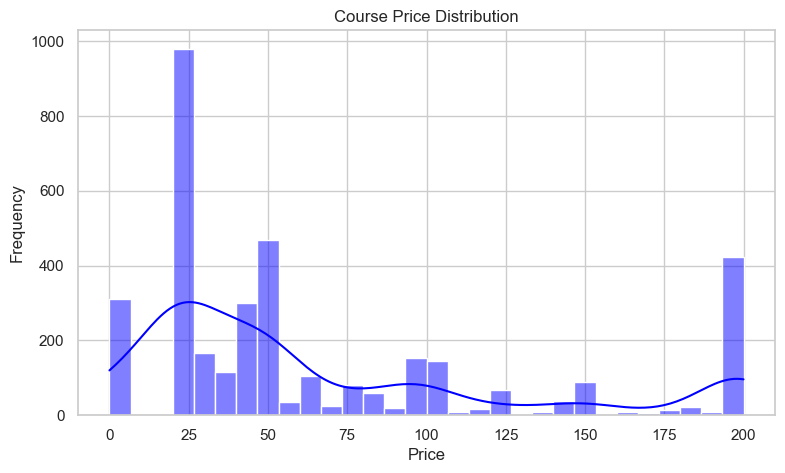

In [94]:
# Histogram for course price distribution
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
sns.histplot(df1, x=df1.price, bins=30, kde=True, color='blue')  # Adding distribution curves with KDE
plt.title('Course Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

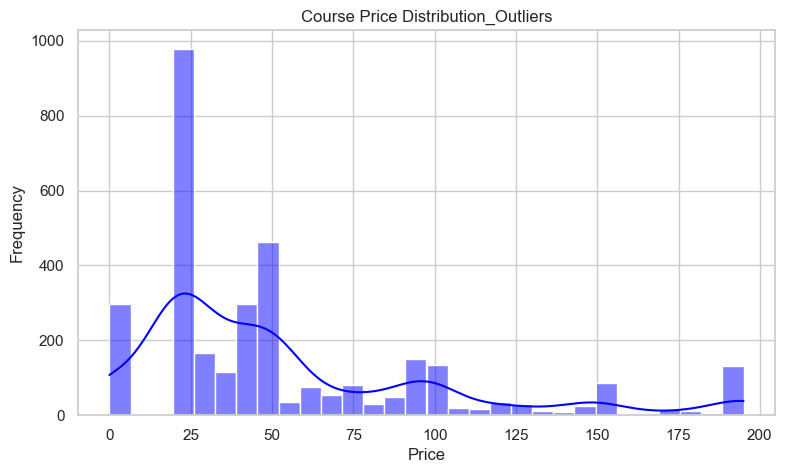

In [95]:
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
sns.histplot(df1, x=df5.price, bins=30, kde=True, color='blue')  # Adding distribution curves with KDE
plt.title('Course Price Distribution_Outliers')
plt.xlabel('Price')
plt.ylabel('Frequency')

<span style="color: blue; font-weight: bold;">Histogram for Course Price Distribution</span>

### Relationship Between Price and Number of Subscribers

Text(0, 0.5, 'Number of Subscribers')

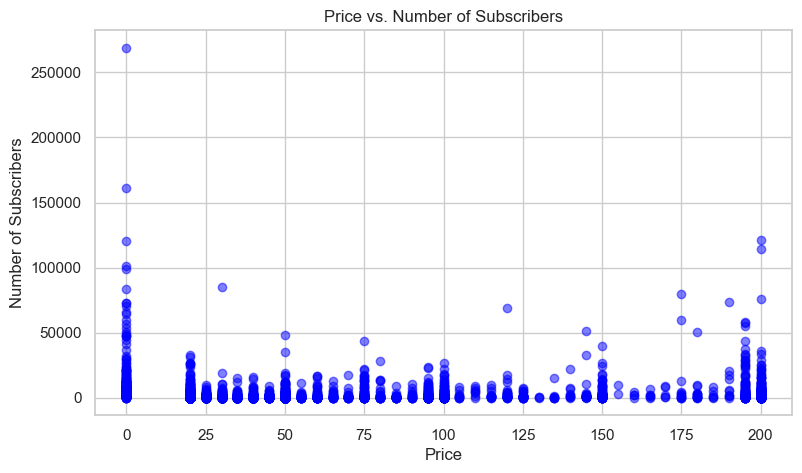

In [98]:
#Scatter plot for price vs. number of subscribers
prices = df1['price']
subscribers = df1['num_subscribers']
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
plt.scatter(prices, subscribers, color='blue', alpha=0.5)  # alpha: transparency

plt.title('Price vs. Number of Subscribers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')

Text(0, 0.5, 'Number of Subscribers')

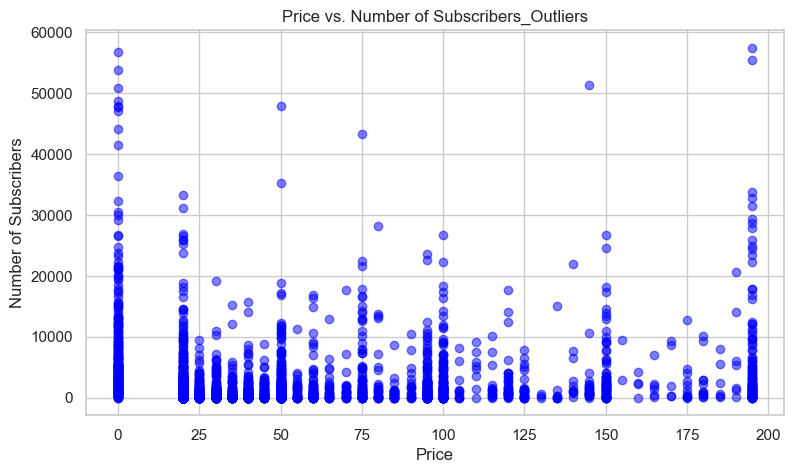

In [99]:
prices = df5['price']
subscribers = df5['num_subscribers']
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
plt.scatter(prices, subscribers, color='blue', alpha=0.5)  # alpha: transparency

plt.title('Price vs. Number of Subscribers_Outliers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')

Text(0, 0.5, 'Number of Subscribers')

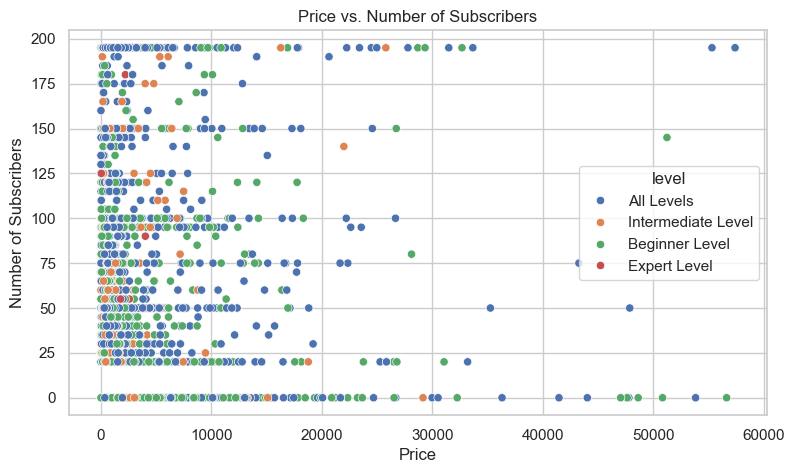

In [100]:
plt.figure(figsize=(9, 5))
sns.scatterplot(df1, x=df5.num_subscribers , y=df5.price, hue=df5.level)
plt.title('Price vs. Number of Subscribers')
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')

<span style="color: blue; font-weight: bold;">Price vs. Number of Subscribers</span>

Text(0, 0.5, 'Number of Reviews')

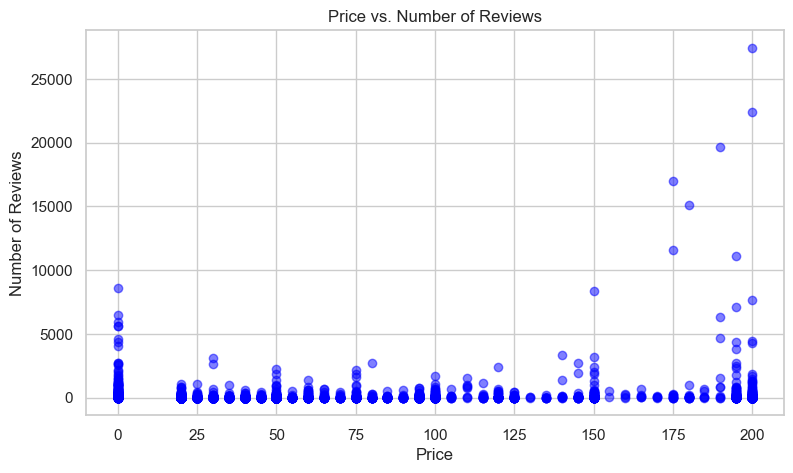

In [102]:
prices = df1['price']
reviews = df1['num_reviews']
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
plt.scatter(prices, reviews, color='blue', alpha=0.5)  # alpha: transparency

plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

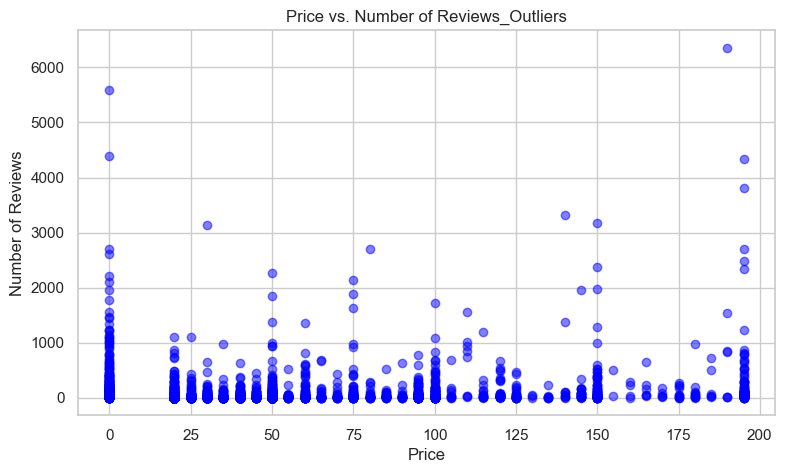

In [103]:
prices = df5['price']
reviews = df5['num_reviews']
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
plt.scatter(prices, reviews, color='blue', alpha=0.5)  # alpha: transparency

plt.title('Price vs. Number of Reviews_Outliers')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

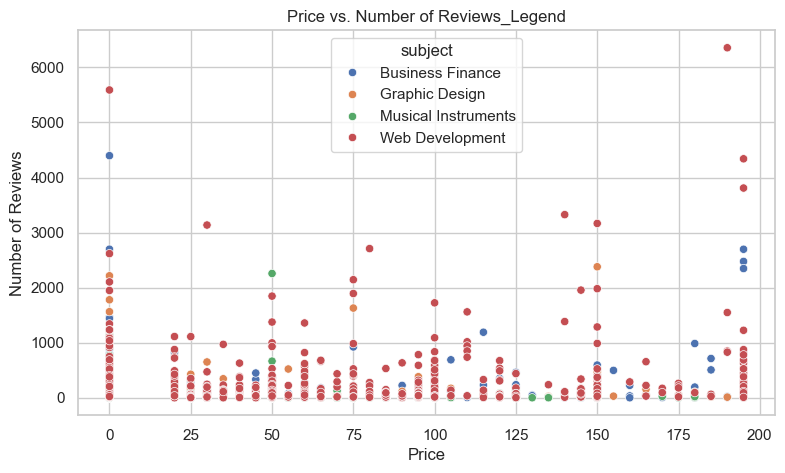

In [104]:
plt.figure(figsize=(9,5))
sns.scatterplot(df1, x=df5.price , y=df5.num_reviews, hue=df1.subject)
plt.title('Price vs. Number of Reviews_Legend')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')

<span style="color: blue; font-weight: bold;">Price vs. Number of Reviews</span>

Text(0, 0.5, 'Number of Lectures')

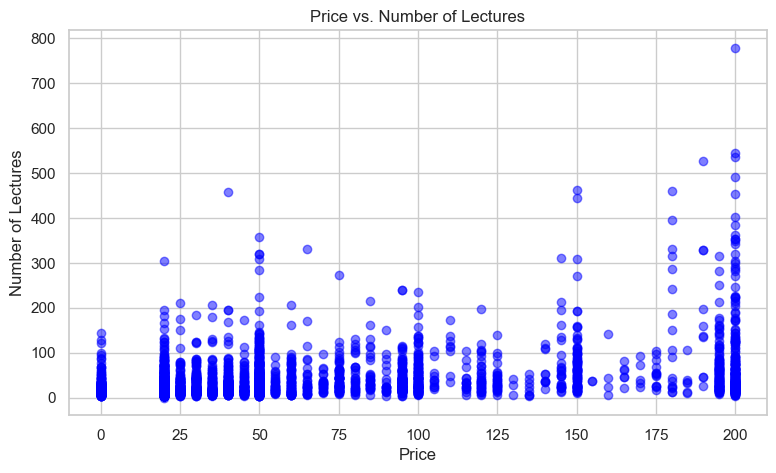

In [106]:
prices = df1['price']
lectures = df1['num_lectures']
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
plt.scatter(prices, lectures, color='blue', alpha=0.5)  # alpha: transparency

plt.title('Price vs. Number of Lectures')
plt.xlabel('Price')
plt.ylabel('Number of Lectures')

Text(0, 0.5, 'Number of Lectures')

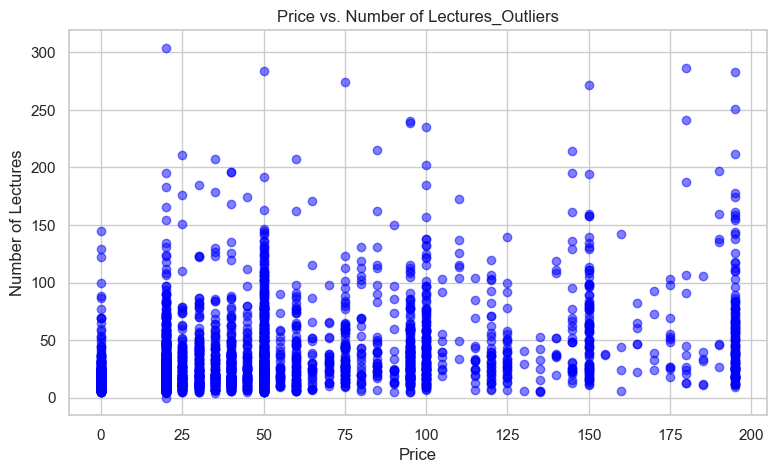

In [107]:
prices = df5['price']
lectures = df5['num_lectures']
plt.figure(figsize=(9, 5))  # Adjusting the graphic size
plt.scatter(prices, lectures, color='blue', alpha=0.5)  # alpha: transparency

plt.title('Price vs. Number of Lectures_Outliers')
plt.xlabel('Price')
plt.ylabel('Number of Lectures')

Text(0, 0.5, 'Number of Lectures')

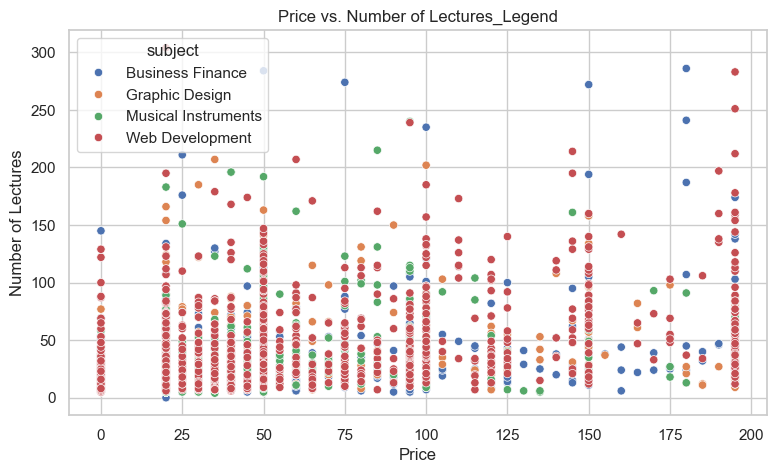

In [108]:
plt.figure(figsize=(9,5))
sns.scatterplot(df1, x=df5.price , y=df5.num_lectures, hue=df1.subject)
plt.title('Price vs. Number of Lectures_Legend')
plt.xlabel('Price')
plt.ylabel('Number of Lectures')

<span style="color: blue; font-weight: bold;">Price vs. Number of Lectures</span>

### Course Level Distribution

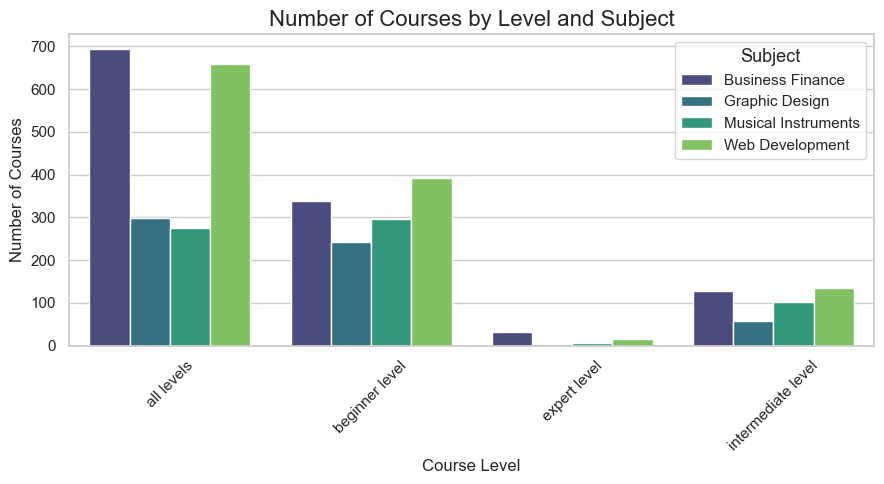

In [111]:
# Bar chart for course levels

plt.figure(figsize=(9, 5))  # Adjusting the graphic size
course_counts = df1.groupby(['level', 'subject']).size().reset_index(name='counts') # Counting by course levels

sns.barplot(data=course_counts, x='level', y='counts', hue='subject', palette='viridis')

plt.title('Number of Courses by Level and Subject', fontsize=16)
plt.xlabel('Course Level', fontsize=12)
plt.ylabel('Number of Courses', fontsize=12)

plt.legend(title='Subject', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45) # For labels on the x-axis

plt.tight_layout() # Prevent graphic elements from overlapping

<span style="color: blue; font-weight: bold;">Bar Chart for Course Levels</span>

### Subject-wise Analysis

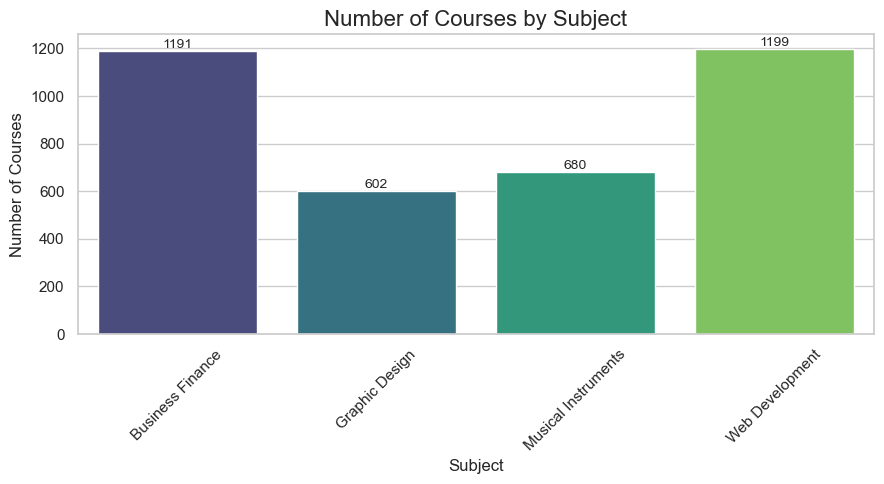

In [114]:
# Bar chart for courses by subject

plt.figure(figsize=(9, 5))  # Adjusting the graphic size

# Using countplot for categorical data, with hue
sns.countplot(data=df1, x='subject', hue='subject', palette='viridis', legend=False) 

plt.title('Number of Courses by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Number of Courses', fontsize=12)

plt.xticks(rotation=45)  # For labels on the x-axis
plt.tight_layout()  # Prevent graphic elements from overlapping

# Placing numbers on bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

### Revenue Analysis by Year

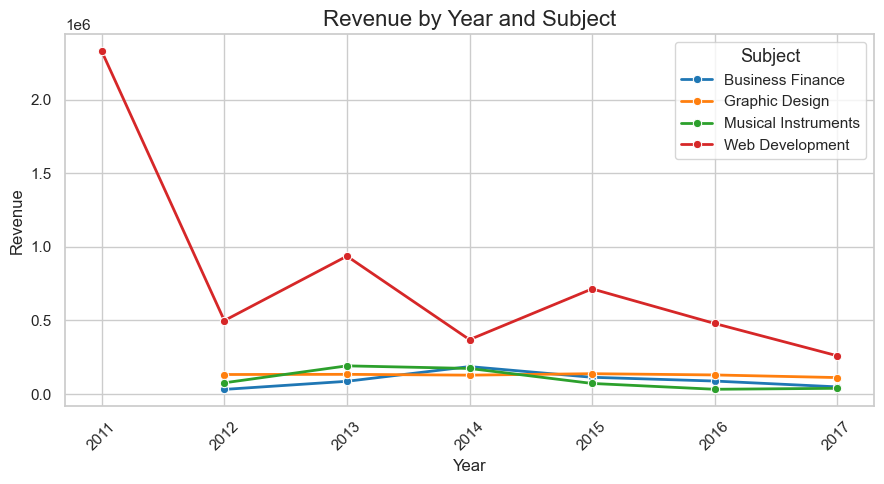

In [116]:
# Line chart for revenue by year

plt.figure(figsize=(9, 5))  # Adjusting the graphic size

# Visualizing revenues by year with lineplot
sns.lineplot(data=df1, x='Year', y='Revenue', errorbar=None, hue='subject', marker='o', palette='tab10', linewidth=2)

plt.title('Revenue by Year and Subject', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

plt.xticks(rotation=45)  # For labels on the x-axis
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Prevent graphic elements from overlapping

plt.legend(title='Subject', title_fontsize='13', fontsize='11')  # Edit Legend

### Content Duration Analysis

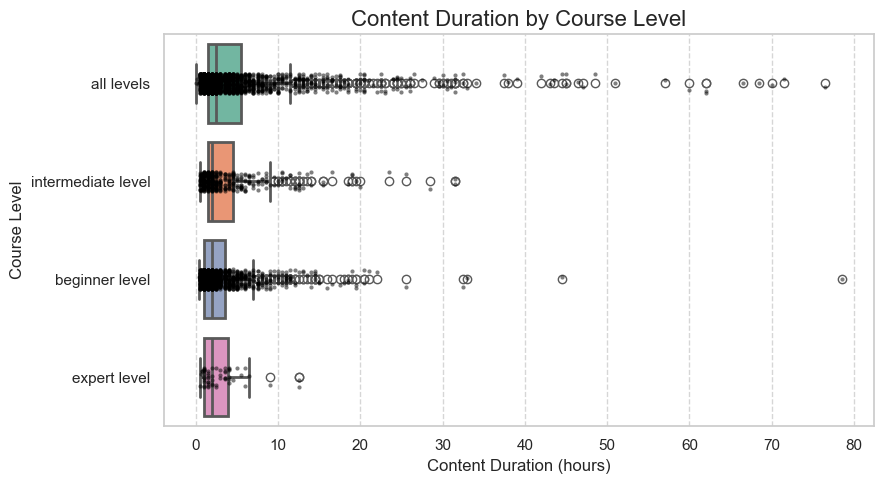

In [118]:
# Boxplot for content duration by course level

plt.figure(figsize=(9, 5)) 

# Visualizing lesson times by course level (Boxplot)
sns.boxplot(data=df1, x='content_duration', y='level', hue='level', palette='Set2', linewidth=2)

# Adding points using stripplot
# jigger Prevent graphic elements from overlapping
sns.stripplot(data=df1, x='content_duration', y='level', color='black', size=3, alpha=0.5, jitter=True) 
plt.title('Content Duration by Course Level', fontsize=16)  
plt.xlabel('Content Duration (hours)', fontsize=12)  
plt.ylabel('Course Level', fontsize=12)  

plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()  

### Most Popular Courses

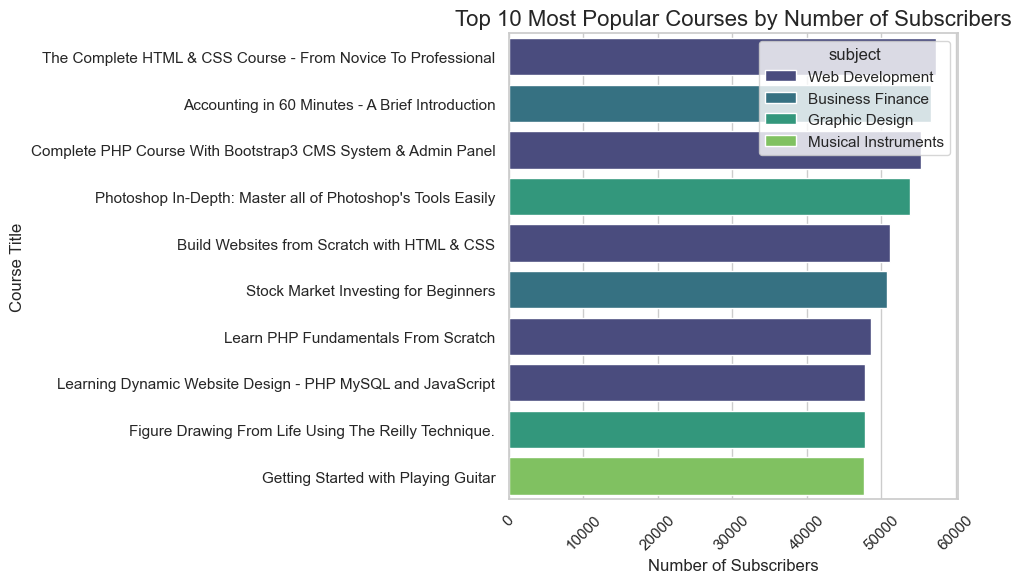

In [120]:
# Bar chart for top 10 most popular courses by subscribers

# Top 10 most popular courses by subscribers
Top_ten_courses = df5.groupby(['course_title', 'subject'])['num_subscribers'].sum().sort_values(ascending=False).head(10)

# Converting data to DataFrame
df_top_ten = Top_ten_courses.reset_index()

# Display a bar chart (coloring with hue)
plt.figure(figsize=(10, 6)) 
sns.barplot(y='course_title', x='num_subscribers', data=df_top_ten, hue='subject', palette='viridis')

plt.title('Top 10 Most Popular Courses by Number of Subscribers', fontsize=16)
plt.xlabel('Number of Subscribers', fontsize=12)
plt.ylabel('Course Title', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

### Relationship Between Number of Lectures and Reviews

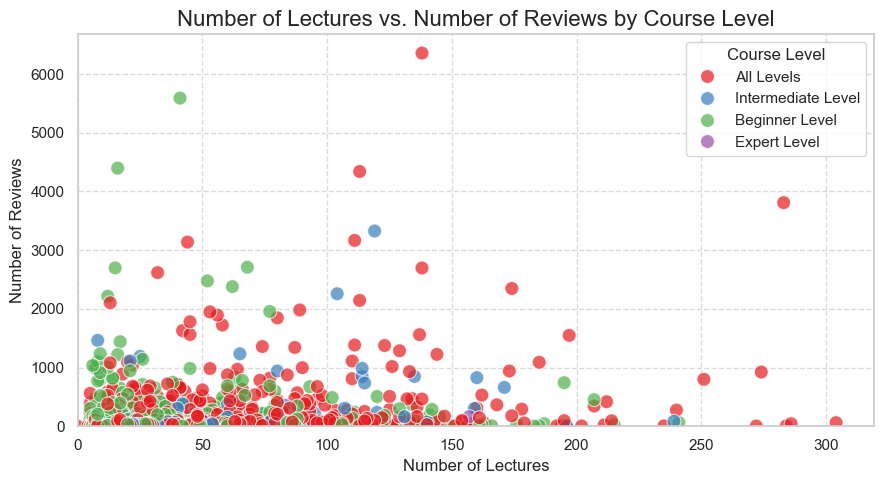

In [122]:
# Scatter plot for number of lectures vs. reviews

plt.figure(figsize=(9, 5))  # Grafik boyutunu ayarlama

sns.scatterplot(data=df5, x='num_lectures', y='num_reviews', hue='level', palette='Set1', s=100, alpha=0.7)

# Grafik başlığı ve eksen etiketleri
plt.title('Number of Lectures vs. Number of Reviews by Course Level', fontsize=16)
plt.xlabel('Number of Lectures', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Set limits to automatically determine axis ranges
plt.xlim(left=0)
plt.ylim(bottom=0)

# Optimizing the chart's layout
plt.legend(title='Course Level')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

### Paid vs Free Courses Analysis

(-1.099999764032772, 1.0999999354795094, -1.099999917392891, 1.099999996066328)

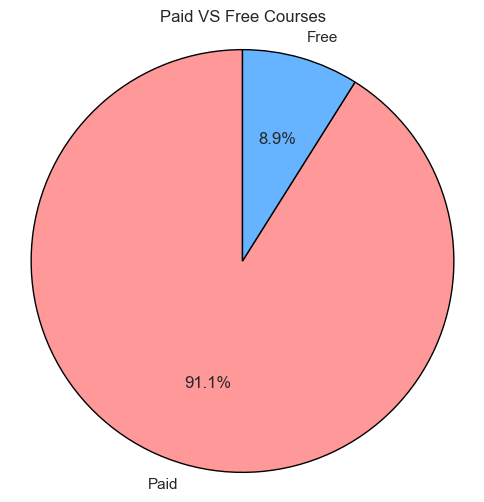

In [124]:
# Pie chart for paid vs free courses

# Calculating percentiles for Paid vs Free Courses
course_percentages = df5['is_paid'].value_counts(normalize=True) * 100

# Categories and percentages
labels = ['Paid', 'Free']
sizes = [course_percentages[True], course_percentages[False]]

# Creating a pie chart
plt.figure(figsize=(6, 6))
colors = ['#ff9999', '#66b3ff']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Paid VS Free Courses')

# Making the axis equal to show the chart properly
plt.axis('equal')

### Correlation Analysis

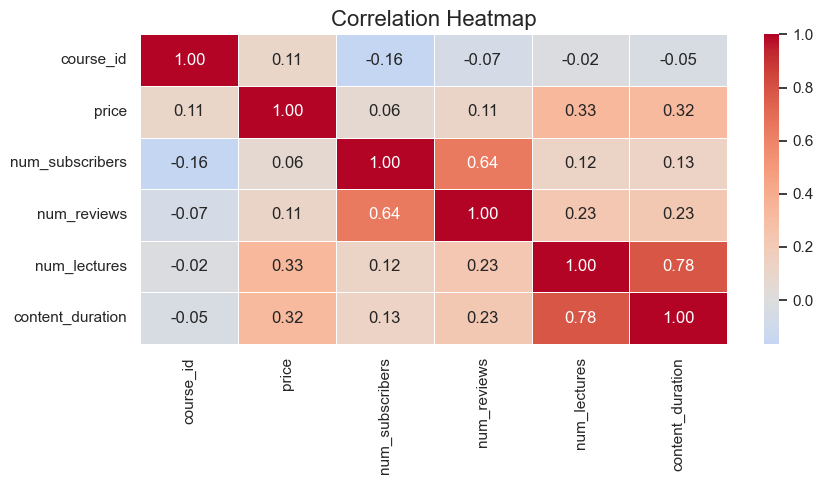

In [126]:
# Correlation heatmap

# Removing unused columns (only numeric columns will remain)
df_numeric = df5.select_dtypes(include=['int64', 'float64'])  # Selected only numeric columns

# Calculating the correlation matrix
correlation_matrix = df_numeric.corr()

# Creating a correlation heatmap
plt.figure(figsize=(9, 5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt='.2f')

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

## Step 6: Conclusion


- Summarize the key insights from the analysis.
- Identify trends in course pricing, popularity, and revenue.
- Suggest potential improvements for Udemy courses based on findings.


### 1. Summarize the Key Insights from the Analysis:
- The dataset reveals a large number of courses across various categories, with a significant portion of them being either free or low-priced.
- The number of students enrolled varies widely, with some courses having a massive number of students, while others have very few.
- There are noticeable trends in course ratings; higher-rated courses tend to have more students enrolled.
- Courses with frequent updates or recent publication dates appear to attract more attention and have higher enrollment rates.

### 2. Identify Trends in Course Pricing, Popularity, and Revenue:
- **Pricing**: Most courses fall into the low to mid-price range, with free courses also making up a significant portion. Higher-priced courses generally tend to offer more in-depth content or specialized topics.
- **Popularity**: Courses that cover trending topics (like technology, personal development, and business) tend to be more popular, particularly those that are updated regularly.
- **Revenue**: Courses with higher student enrollment and good ratings tend to generate the most revenue. High-rated courses, even if priced lower, can generate substantial revenue due to volume.

### 3.Suggest Potential Improvements for Udemy Courses Based on Findings:

- **Regular Updates**: Courses should be updated frequently, especially in fast-evolving fields like technology. Regular updates attract more students and maintain the course’s relevance.
- **Focus on Trending Topics**: Creating more courses in areas like AI, data science, and software development will likely increase enrollment.
- **Improving Ratings**: Encourage student feedback and improve course quality based on reviews. Higher-rated courses tend to attract more students and generate more revenue.
- **Flexible Pricing**: Experimenting with pricing strategies, such as offering discounts or bundling similar courses, can help increase revenue, especially for courses with lower enrollment.